In [6]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [12]:
params = pd.read_csv("../data/interim/interim_data.csv")

In [13]:
try:
    params = params.drop(["ID","StudySample","HatchOffsetFromCountour", "MicroCTScan", "Machine", "Powder"], axis=1)
    params = params.drop([10,14,9], axis=0).reset_index(drop=True)
    print("dropped columns")
except:
    print("already dropped columns")
params = params[["LaserPowerHatch","LaserSpeedHatch","HatchSpacing", "LayerHeight", "LaserPowerContour","EnergyDensityCalculated","Porosity"]]
params = params.sort_values(by=['Porosity'])

dropped columns


In [14]:
params['level']  = pd.qcut(params.Porosity, q=[0, 0.5, 1.0], labels =['low','high'])

In [15]:
params.EnergyDensityCalculated = params.LaserPowerHatch / (params.LaserSpeedHatch * params.HatchSpacing * params.LayerHeight)

split_pct = .25
seed = 200

train_data = params.sample(frac=1-split_pct, random_state=seed).reset_index(drop=True)
test_data = params.drop(train_data.index).sample(frac=1, random_state=seed).reset_index(drop=True)

In [280]:
train_vals = train_data.values
test_vals = test_data.values
X = train_vals[:,-3].reshape(-1,1)
y = train_vals[:,-2].reshape(-1, 1)

Xtest = test_vals[:,-3].reshape(-1, 1)
ytest = test_vals[:,-2].reshape(-1, 1)

model2 = LinearRegression()
model2.fit(X, y.T[0])

print(model2.score(Xtest, ytest))

-1.5759720541214892


In [281]:
from sklearn.neural_network import MLPRegressor
from sklearn import svm

svr_model1 = svm.SVR(kernel='poly', degree=2)
svr_model1.fit(X, y.T[0])

mlp_regressor = MLPRegressor(hidden_layer_sizes=9, solver='lbfgs',activation='tanh', max_iter=10000)
mlp_regressor.fit(X, y.T[0])

mlp_regressor.score(Xtest,ytest.T[0])

-1.6236978997440166

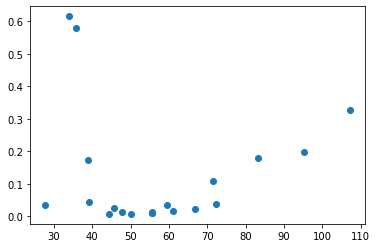

In [282]:
import matplotlib.pyplot as plt
# plotting for bayesian models
plt.plot(params.EnergyDensityCalculated, params.Porosity, 'o')
plt.show()

In [283]:
from sklearn.preprocessing import MinMaxScaler

scale = preprocessing.MinMaxScaler().fit(params.iloc[:,:-1])
params.iloc[:,:-1] = pd.DataFrame(scale.transform(params.iloc[:,:-1])) 

In [284]:
params.columns

Index(['LaserPowerHatch', 'LaserSpeedHatch', 'HatchSpacing', 'LayerHeight',
       'LaserPowerContour', 'EnergyDensityCalculated', 'Porosity', 'level'],
      dtype='object')

<AxesSubplot:>

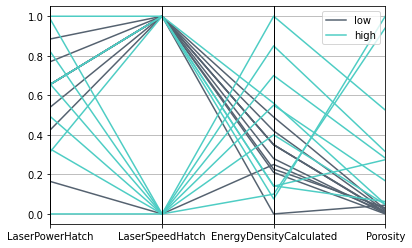

In [285]:
pd.plotting.plot_params = {'figsize': (30,30)}
pd.plotting.parallel_coordinates(params, class_column='level', cols=['LaserPowerHatch', 'LaserSpeedHatch', 'EnergyDensityCalculated', 'Porosity'], color=('#556270', '#4ECDC4', '#C7F464'))
